## Методические указания по выполнению лабораторной работы №5

**Тема: Обучение модели YOLO на кастомном датасете и исследование влияния гиперпараметров на качество детекции**

**Цель работы:** Познакомиться с архитектурой YOLO на примере проверки гипотезы о релевантной метрике.

**Задачи:**

- Ознакомиться с архитектурой YOLO.
- Изучить метрики для анализа производительности модели, выбрать целевую метрику в соответствии с вариантом.
- Выбрать предметную область, сформировать гипотезу для проведения исследования.
- Собрать и проаннотировать данные, сформировать датасет.
- Провести fine-tuning предобученной модели YOLOv11 Nano/Small.
- Визуализировать и проанализировать результаты.
- На основе анализа сделать корректировку гиперпараметров/данных и провести вторую итерацию для повышения показателей.

### 1. Подготовка к обучению

#### 1.1 Метрики

Вариант 1 - Precision

Вариант 2 - Recall

Вариант 3 - F1

Вариант 4 - mAP@0.5

Вариант 5 - mAP@0.75


#### 1.2 Гипотеза

Гипотеза должна отражать характер уклона исследования с обоснованием, отталкиваясь от предметной области. *Одна лишь констатация необходимости достижения высокого значения целевой метрики не является обоснованием*.

#### 1.3 Данные

Соберите не менее 500 изображений из открытых источников. Можно пользоваться готовыми наборами данных, но важно проверить качество: разрешение изображений, качество аннотаций, баланс классов. При самостоятельном сборе данных можете воспользоваться терминальной утилитой ffmpeg для нарезки видео на кадры и любым удобным инструментом аннотирования (Roboflow, CVAT и тд).

#### 1.4 Предобработка

Примените методы аугментации к данным для расширения объема датасета для получения 1.5-2к изображений. Подготовьте данные к требуемому формату для обучающего процесса.

### 2. Обучение модели

#### 2.1 Подготовка окружения

Установите зависимости и библиотеки:

In [ ]:
!pip install albumentations opencv-python

In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# импорт пакетов
from ultralytics import YOLO
import cv2
import albumentations as A
from ultralytics import YOLO
from pathlib import Path
import random
import numpy as np
import json
import matplotlib.pyplot as plt
from pathlib import Path
from albumentations.pytorch import ToTensorV2

#### 2.2 Подготовка модели

Загрузите предобученную модель, определите устройство, переведите модель в режим инференса. Не используйте размер модели больше чем Small для достижения лучших показателей на стандартных гиперпараметрах (особенно imgsz)

In [ ]:
# импорт модели
model = YOLO()

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


#### 2.3 Загрузка и предобработка изображений


Затем импортируйте датасет в проект и выполните трансформацию данных (при использовании Roboflow трансформация выполняется на этапе предобработки):

In [ ]:
!unzip "People Detection.v8i.yolov11.zip"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/labels/FudanPed00035_png.rf.2928a6dadaed81ebaaefd8d8c1b1fbc3.txt  
  inflating: train/labels/FudanPed00035_png.rf.561f5fabdbbd41e65cacfcc73c52c22b.txt  
  inflating: train/labels/FudanPed00037_png.rf.2cbf629b6606e4ae6fcd9d3e06931348.txt  
  inflating: train/labels/FudanPed00037_png.rf.46a0cef9c05d83b1662c36c928055c6f.txt  
  inflating: train/labels/FudanPed00037_png.rf.9f91e445dac1f141005faae99a6c627e.txt  
  inflating: train/labels/FudanPed00038_png.rf.0853d95119f7aee013a8762123b146af.txt  
  inflating: train/labels/FudanPed00038_png.rf.a02242c6c972389ef045d6b62d8a1a0a.txt  
  inflating: train/labels/FudanPed00038_png.rf.aed4a8257c60fc915e17b4ca03eecf2b.txt  
  inflating: train/labels/FudanPed00041_png.rf.126d7cd04d45713594785225ac466e32.txt  
  inflating: train/labels/FudanPed00041_png.rf.b1c4e05f7ba7a4376c701fa786b44d19.txt  
  inflating: train/labels/FudanPed00041_png.rf.e5e5ab6a2d21d379b8f351560

In [ ]:
def custom_augmentations():
    return A.Compose([
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        A.MotionBlur(blur_limit=7, p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), p=0.5),
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
        A.RandomRotate90(p=0.5),
        A.VerticalFlip(p=0.5),
        A.HorizontalFlip(p=0.5),
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['labels']))

def apply_augmentation(image, bboxes, augmenter):
    labels = [0] * len(bboxes)
    augmented = augmenter(image=image, bboxes=bboxes, labels=labels)
    return augmented['image'], augmented['bboxes']

def save_augmented_data(image, bboxes, img_path, label_path):
    augmented_img_path = img_path.stem + '_aug.jpg'
    cv2.imwrite(str(Path(img_path.parent, augmented_img_path)), image)

    augmented_label_path = label_path.stem + '_aug.txt'
    with open(str(Path(label_path.parent, augmented_label_path)), 'w') as f:
        for bbox in bboxes:
            x_center, y_center, width, height = bbox
            f.write(f"0 {x_center} {y_center} {width} {height}\n")

def augment_and_train(model, data_yaml, epochs=50, batch_size=16):
    augmenter = custom_augmentations()

    image_dir = Path('train/images')
    label_dir = Path('train/labels')

    for img_path in image_dir.glob("*.jpg"):
        label_path = label_dir / img_path.with_suffix(".txt").name

        image = cv2.imread(str(img_path))

        bboxes = []
        with open(str(label_path), 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    _, x, y, w, h = map(float, parts)
                    bboxes.append([x, y, w, h])

        if not bboxes:
            continue

        augmented_image, augmented_bboxes = apply_augmentation(image, bboxes, augmenter)
        save_augmented_data(augmented_image, augmented_bboxes, img_path, label_path)

    model.train(
        data=data_yaml,
        epochs=epochs,
        batch=batch_size,
        imgsz=640,
        name='augmented_training',
        augment=True,
        patience=10,
    )

In [ ]:
def draw_boxes(img, bboxes, color=(0, 255, 0), thickness=2):
    img = img.copy()
    h, w = img.shape[:2]
    for bbox in bboxes:
        x_center, y_center, bw, bh = bbox
        x1 = int((x_center - bw / 2) * w)
        y1 = int((y_center - bh / 2) * h)
        x2 = int((x_center + bw / 2) * w)
        y2 = int((y_center + bh / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)
    return img

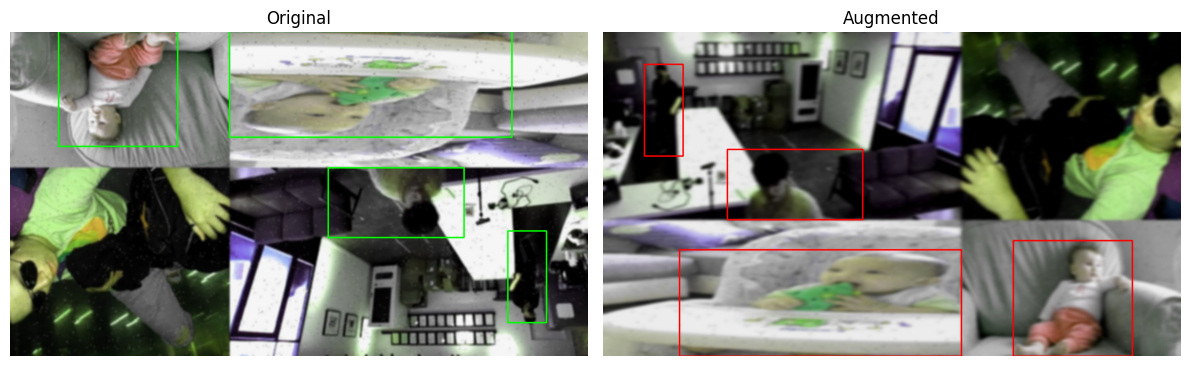

In [ ]:
image_path = Path('train/images')
label_path = Path('train/labels')

img_file = random.choice(list(image_path.glob("*.jpg")))
label_file = label_path / img_file.with_suffix(".txt").name

image = cv2.imread(str(img_file))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bboxes = []
with open(str(label_file), 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 5:
            _, x, y, w, h = map(float, parts)
            bboxes.append([x, y, w, h])

augmenter = custom_augmentations()
labels = [0] * len(bboxes)
augmented = augmenter(image=image, bboxes=bboxes, labels=labels)

aug_img = augmented['image']
aug_bboxes = augmented['bboxes']

img_with_boxes = draw_boxes(image, bboxes)
aug_with_boxes = draw_boxes(aug_img, aug_bboxes, color=(255, 0, 0))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_with_boxes)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Augmented")
plt.imshow(aug_with_boxes)
plt.axis("off")

plt.tight_layout()
plt.show()


#### 2.4 Обучение, оценка модели и визуализация результатов

Проведите обучение модели, проанализируйте кривые обучения, метрики и тестовые данные. Сделайте вывод и корректироваки для достижения лучших показателей

In [ ]:
augment_and_train(model, data_yaml='data.yaml', epochs=50)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=augmented_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, 

100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 28987 images, 1917 backgrounds, 0 corrupt: 100%|██████████| 28987/28987 [00:24<00:00, 1176.51it/s]

train: WARNING ⚠️ /content/train/images/000066_jpg.rf.7af12755c989607af4ff8faf8be1ed1b.jpg: 16 duplicate labels removed
train: WARNING ⚠️ /content/train/images/000066_jpg.rf.7af12755c989607af4ff8faf8be1ed1b_aug.jpg: 16 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_002387_jpg.rf.b185b9383eb87d476665f67d98e93996.jpg: 13 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_002387_jpg.rf.b185b9383eb87d476665f67d98e93996_aug.jpg: 13 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_002845_jpg.rf.f86d7a1b7e9851bf8201be8dcaf3c8ec.jpg: 23 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_002845_jpg.rf.f86d7a1b7e9851bf8201be8dcaf3c8ec_aug.jpg: 23 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_003226_jpg.rf.f1f5326d95fecd08c5a9dfdad9259e28.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_003226_jpg.rf.f1f5326d95fecd08c5a9dfdad9259e28_aug.jpg: 1 duplicate labels remo

train: New cache created: /content/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 428, len(boxes) = 201481. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 31.9±43.0 MB/s, size: 435.5 KB)


val: Scanning /content/valid/labels... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:02<00:00, 620.89it/s]

val: WARNING ⚠️ /content/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
val: New cache created: /content/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/augmented_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/augmented_training
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.22G      1.549      1.762      1.356        193        640: 100%|██████████| 1812/1812 [10:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:16<00:00,  2.77it/s]


                   all       1431      10660      0.654      0.528      0.548      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.82G       1.54        1.5      1.339         85        640: 100%|██████████| 1812/1812 [10:14<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.12it/s]


                   all       1431      10660      0.655      0.469       0.51      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.83G      1.605      1.537      1.385        126        640: 100%|██████████| 1812/1812 [10:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.02it/s]


                   all       1431      10660      0.673      0.443       0.49       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.83G      1.614      1.535      1.402        222        640: 100%|██████████| 1812/1812 [10:37<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.21it/s]


                   all       1431      10660      0.649      0.464      0.519      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.85G      1.549      1.451      1.367         87        640: 100%|██████████| 1812/1812 [10:16<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:16<00:00,  2.70it/s]


                   all       1431      10660      0.697      0.486      0.549      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.86G      1.511      1.394      1.342         91        640: 100%|██████████| 1812/1812 [10:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.11it/s]


                   all       1431      10660      0.703      0.503      0.563      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.86G       1.48      1.353       1.32        175        640: 100%|██████████| 1812/1812 [10:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:15<00:00,  2.92it/s]


                   all       1431      10660      0.725      0.512      0.576      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.87G      1.453      1.314      1.304        160        640: 100%|██████████| 1812/1812 [09:59<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.05it/s]


                   all       1431      10660      0.713      0.526      0.595      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.88G      1.432      1.285      1.292        200        640: 100%|██████████| 1812/1812 [09:57<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.20it/s]


                   all       1431      10660      0.726      0.531      0.602      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.89G      1.414       1.27      1.282        163        640: 100%|██████████| 1812/1812 [09:59<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.20it/s]


                   all       1431      10660       0.74      0.543      0.618      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.9G      1.396      1.248      1.274        112        640: 100%|██████████| 1812/1812 [09:48<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.31it/s]


                   all       1431      10660      0.755      0.554      0.632      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.91G      1.388      1.226      1.262        151        640: 100%|██████████| 1812/1812 [10:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.15it/s]

                   all       1431      10660      0.749      0.555      0.632       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.92G       1.37      1.211      1.255        102        640: 100%|██████████| 1812/1812 [09:50<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.12it/s]


                   all       1431      10660      0.752      0.564      0.641      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.93G      1.362      1.199      1.251        185        640: 100%|██████████| 1812/1812 [09:58<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:15<00:00,  2.99it/s]

                   all       1431      10660      0.761      0.563      0.643      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.94G      1.349      1.187      1.244        153        640: 100%|██████████| 1812/1812 [09:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]

                   all       1431      10660      0.761      0.564      0.645      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.95G      1.341      1.176      1.239        244        640: 100%|██████████| 1812/1812 [09:48<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.11it/s]

                   all       1431      10660      0.775      0.571      0.656       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.96G      1.329      1.164      1.231        130        640: 100%|██████████| 1812/1812 [09:52<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.33it/s]

                   all       1431      10660      0.769       0.58      0.662      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.97G      1.323      1.154      1.228        168        640: 100%|██████████| 1812/1812 [09:43<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.30it/s]

                   all       1431      10660      0.765      0.581      0.663      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.98G      1.316      1.138      1.222        257        640: 100%|██████████| 1812/1812 [09:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.31it/s]

                   all       1431      10660      0.778      0.582      0.668      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.99G      1.305      1.125      1.215         96        640: 100%|██████████| 1812/1812 [09:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.28it/s]

                   all       1431      10660       0.77      0.585      0.668      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         5G      1.298      1.122      1.213        128        640: 100%|██████████| 1812/1812 [09:43<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.32it/s]

                   all       1431      10660      0.774      0.591      0.673      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.01G      1.287      1.114      1.208        104        640: 100%|██████████| 1812/1812 [10:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]

                   all       1431      10660      0.775      0.596      0.676        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.02G      1.278      1.103      1.204        180        640: 100%|██████████| 1812/1812 [09:48<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:15<00:00,  2.84it/s]

                   all       1431      10660      0.782      0.597      0.678      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.03G      1.279      1.099      1.201         74        640: 100%|██████████| 1812/1812 [09:59<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.30it/s]


                   all       1431      10660      0.782      0.599      0.682      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.04G      1.267      1.083      1.193         50        640: 100%|██████████| 1812/1812 [09:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]

                   all       1431      10660      0.776      0.609      0.686      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.05G      1.263       1.08      1.189        126        640: 100%|██████████| 1812/1812 [09:51<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.29it/s]


                   all       1431      10660      0.776      0.611      0.688      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.06G      1.258      1.077      1.187        135        640: 100%|██████████| 1812/1812 [09:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.03it/s]

                   all       1431      10660      0.778      0.614      0.689      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.07G       1.25       1.06      1.183         96        640: 100%|██████████| 1812/1812 [09:49<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.13it/s]


                   all       1431      10660      0.781      0.612       0.69      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.08G      1.244      1.057       1.18         82        640: 100%|██████████| 1812/1812 [09:58<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.05it/s]

                   all       1431      10660      0.786       0.61      0.691      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.09G      1.234      1.046      1.175         90        640: 100%|██████████| 1812/1812 [09:58<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 9/45 [00:04<00:16,  2.15it/s]


KeyboardInterrupt: 

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


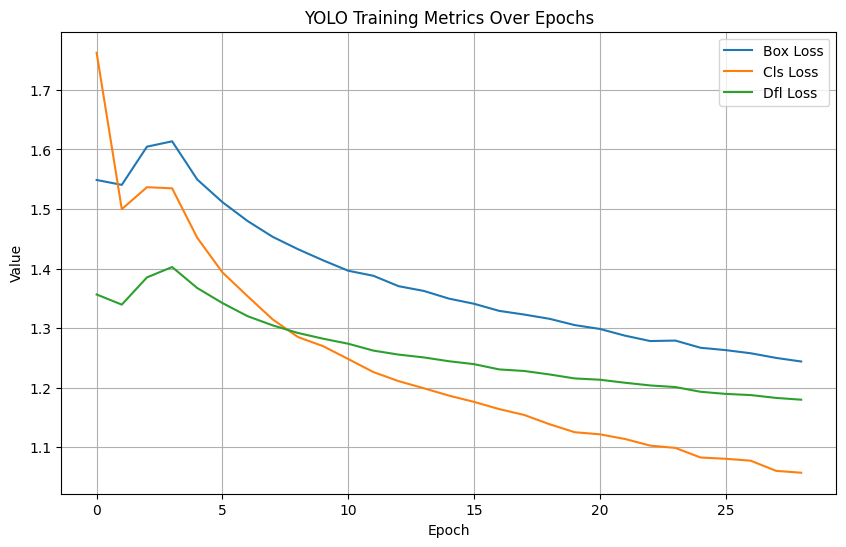

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

log_file = './runs/detect/augmented_training/results.csv'

df = pd.read_csv(log_file)

print(df.columns)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['train/box_loss'], label='Box Loss')
plt.plot(df.index, df['train/cls_loss'], label='Cls Loss')
plt.plot(df.index, df['train/dfl_loss'], label='Dfl Loss')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('YOLO Training Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

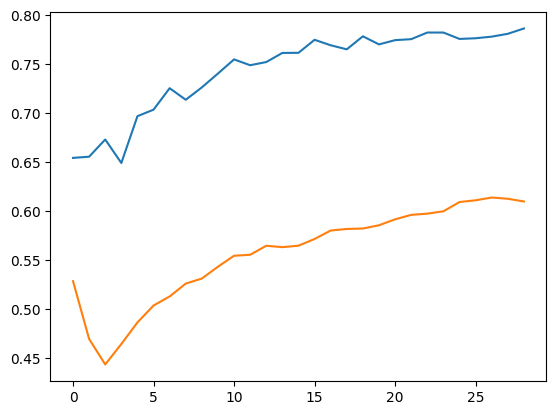

In [ ]:
plt.plot(df.index, df['metrics/precision(B)'], label='Precision')
plt.plot(df.index, df['metrics/recall(B)'], label='Recall')
plt.show()

0.6867052793616187


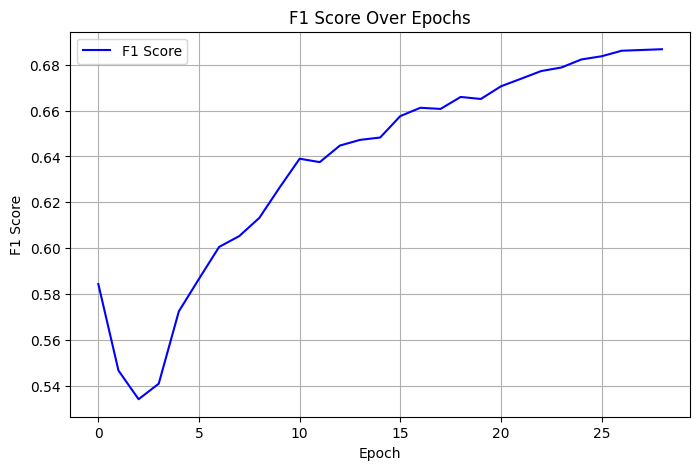

In [ ]:
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']

epsilon = 1e-8
f1_scores = 2 * (precision * recall) / (precision + recall + epsilon)
print(max(f1_scores))

plt.figure(figsize=(8, 5))
plt.plot(df.index, f1_scores, label='F1 Score', color='blue')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score Over Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
results = model.val(data="./data.yaml", imgsz=640)

f1 = results.box.f1

print("F1 Score:", f1)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2082.0±717.8 MB/s, size: 171.9 KB)


val: Scanning /content/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:19<00:00,  4.63it/s]


                   all       1431      10660      0.771      0.599      0.674      0.397
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val4
F1 Score: [    0.67414]


#### 2.5 Вторая итерация

Проведите процедуры для достижения высоких показателей (корректировка данных/гиперпараметров), сделайте вывод


In [ ]:
model2 = YOLO()

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


In [ ]:
    model2.train(
        data="./data.yaml",
        epochs=30,
        batch=16,
        imgsz=640,
        name='no_augmentation_training',
        patience=10,
        augment=False
    )

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./data.yaml, epochs=30, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=no_augmentation_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 15210 images, 1917 backgrounds, 0 corrupt: 100%|██████████| 15210/15210 [00:06<00:00, 2369.99it/s]

train: WARNING ⚠️ /content/train/images/000066_jpg.rf.7af12755c989607af4ff8faf8be1ed1b.jpg: 16 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_002387_jpg.rf.b185b9383eb87d476665f67d98e93996.jpg: 13 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_002845_jpg.rf.f86d7a1b7e9851bf8201be8dcaf3c8ec.jpg: 23 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2007_003226_jpg.rf.f1f5326d95fecd08c5a9dfdad9259e28.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2008_003526_jpg.rf.4a836fd57d560fc005eab941399b6500.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2008_003598_jpg.rf.df9555297acad95b8d1833b8cb78e7fb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2008_003608_jpg.rf.11cb8904ac10f9f5fbaba7b3da1a5364.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/2008_006361_jpg.rf.d7c25efb2ad609216a8fcff048099734.jpg: 1 duplicate labels removed
train: WAR

train: New cache created: /content/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 428, len(boxes) = 99059. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 379.1±203.4 MB/s, size: 464.5 KB)


val: Scanning /content/valid/labels... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:01<00:00, 1054.58it/s]

val: WARNING ⚠️ /content/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
val: New cache created: /content/valid/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/no_augmentation_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/no_augmentation_training
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.62G       1.52      1.595      1.316        182        640: 100%|██████████| 951/951 [05:22<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:16<00:00,  2.75it/s]


                   all       1431      10660      0.599      0.409      0.422      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.79G      1.562      1.451      1.359        104        640: 100%|██████████| 951/951 [05:15<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:17<00:00,  2.64it/s]


                   all       1431      10660      0.636      0.412      0.445      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.81G      1.531      1.408      1.352         81        640: 100%|██████████| 951/951 [05:12<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]

                   all       1431      10660      0.643      0.445      0.478      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.82G      1.494      1.357      1.329        135        640: 100%|██████████| 951/951 [05:10<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.05it/s]


                   all       1431      10660       0.68      0.474      0.528      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.84G      1.447      1.303      1.303        103        640: 100%|██████████| 951/951 [05:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.16it/s]

                   all       1431      10660      0.683        0.5      0.542      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.85G       1.41      1.255      1.282        127        640: 100%|██████████| 951/951 [05:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.18it/s]

                   all       1431      10660      0.696      0.509      0.567      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.87G      1.382      1.213      1.266        134        640: 100%|██████████| 951/951 [05:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.16it/s]


                   all       1431      10660      0.703      0.514      0.573      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.88G      1.359      1.191      1.252         75        640: 100%|██████████| 951/951 [05:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]

                   all       1431      10660      0.713      0.513      0.579      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       4.9G      1.343      1.164      1.241        246        640: 100%|██████████| 951/951 [05:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]

                   all       1431      10660      0.697      0.541       0.59      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.91G      1.326      1.151      1.233        112        640: 100%|██████████| 951/951 [05:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.32it/s]

                   all       1431      10660      0.721       0.55      0.613      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.93G      1.307      1.126      1.223         88        640: 100%|██████████| 951/951 [05:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.15it/s]

                   all       1431      10660       0.74      0.541      0.618      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.94G      1.296      1.114      1.215         84        640: 100%|██████████| 951/951 [05:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]

                   all       1431      10660      0.732      0.554      0.619      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.96G      1.275       1.09      1.204        113        640: 100%|██████████| 951/951 [05:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]


                   all       1431      10660      0.737      0.556       0.63      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.96G      1.269      1.077        1.2         86        640: 100%|██████████| 951/951 [05:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]


                   all       1431      10660      0.754      0.541      0.618      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.98G      1.243      1.057      1.189        132        640: 100%|██████████| 951/951 [05:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]


                   all       1431      10660      0.751      0.571       0.64      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         5G      1.237      1.043      1.183        116        640: 100%|██████████| 951/951 [05:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.30it/s]


                   all       1431      10660      0.748      0.575      0.644      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.01G      1.227       1.03      1.177         76        640: 100%|██████████| 951/951 [05:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.33it/s]

                   all       1431      10660      0.762      0.568       0.65      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.02G      1.211      1.018      1.172         79        640: 100%|██████████| 951/951 [05:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:15<00:00,  2.97it/s]

                   all       1431      10660      0.748      0.574      0.653       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.04G        1.2      1.003      1.161         59        640: 100%|██████████| 951/951 [05:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.13it/s]

                   all       1431      10660      0.761      0.577      0.661       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.06G      1.193      0.992      1.157        166        640: 100%|██████████| 951/951 [05:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:15<00:00,  2.96it/s]

                   all       1431      10660       0.77      0.578      0.662      0.386


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.07G      1.163     0.9426      1.151        100        640: 100%|██████████| 951/951 [04:53<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.15it/s]


                   all       1431      10660       0.77      0.584      0.667       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.08G      1.149     0.9232      1.142        128        640: 100%|██████████| 951/951 [04:50<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]

                   all       1431      10660      0.771      0.583      0.669      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       5.1G      1.132     0.9037      1.136         71        640: 100%|██████████| 951/951 [04:49<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]

                   all       1431      10660      0.778      0.588      0.671      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.12G      1.123     0.8901      1.128         88        640: 100%|██████████| 951/951 [04:46<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:15<00:00,  3.00it/s]

                   all       1431      10660      0.764      0.589      0.667      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.13G      1.107     0.8762      1.123         61        640: 100%|██████████| 951/951 [04:49<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.30it/s]

                   all       1431      10660      0.768      0.592      0.674      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.14G      1.094     0.8641      1.114         34        640: 100%|██████████| 951/951 [04:48<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]


                   all       1431      10660      0.765      0.605      0.681      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.16G       1.08      0.847      1.105        113        640: 100%|██████████| 951/951 [04:45<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.01it/s]

                   all       1431      10660      0.777      0.604      0.683      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.17G      1.068     0.8335        1.1         43        640: 100%|██████████| 951/951 [04:49<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]

                   all       1431      10660      0.768       0.61      0.686      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.19G      1.055     0.8224      1.094         73        640: 100%|██████████| 951/951 [04:47<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]


                   all       1431      10660      0.778      0.612      0.691      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       5.2G      1.048     0.8142       1.09         67        640: 100%|██████████| 951/951 [04:49<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]

                   all       1431      10660      0.775      0.614       0.69      0.416



30 epochs completed in 2.632 hours.
Optimizer stripped from runs/detect/no_augmentation_training/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/no_augmentation_training/weights/best.pt, 5.4MB

Validating runs/detect/no_augmentation_training/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:15<00:00,  2.87it/s]


                   all       1431      10660      0.775      0.614       0.69      0.416
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/no_augmentation_training


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a29db70b890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


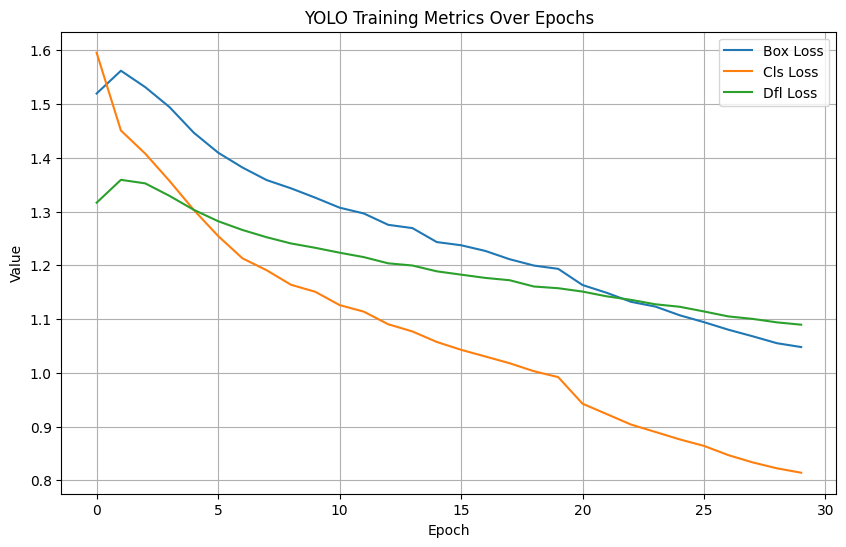

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

log_file = './runs/detect/no_augmentation_training/results.csv'

df = pd.read_csv(log_file)

print(df.columns)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['train/box_loss'], label='Box Loss')
plt.plot(df.index, df['train/cls_loss'], label='Cls Loss')
plt.plot(df.index, df['train/dfl_loss'], label='Dfl Loss')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('YOLO Training Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

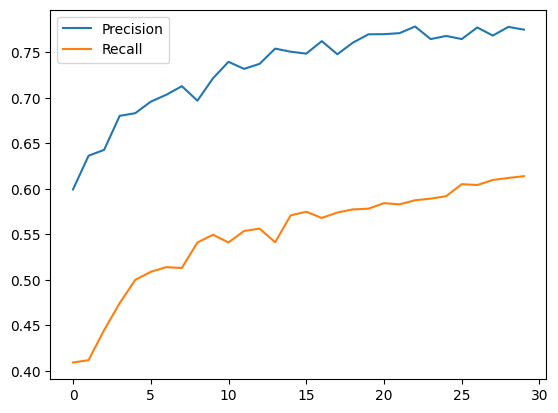

In [ ]:
plt.plot(df.index, df['metrics/precision(B)'], label='Precision')
plt.plot(df.index, df['metrics/recall(B)'], label='Recall')
plt.legend()
plt.show()

0.685102012290098


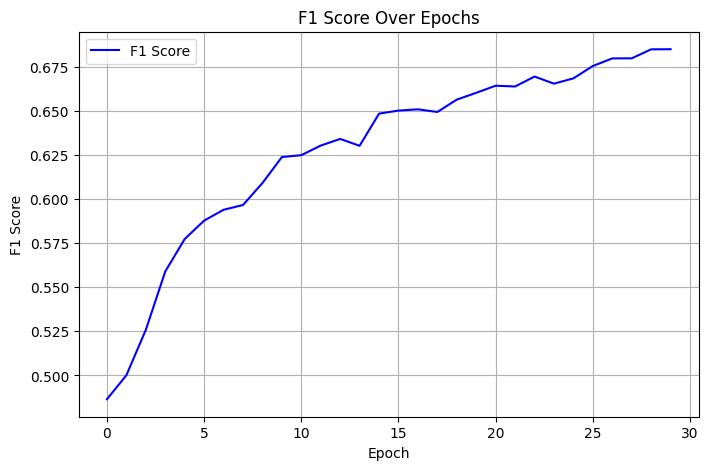

In [ ]:
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']

epsilon = 1e-8
f1_scores = 2 * (precision * recall) / (precision + recall + epsilon)
print(max(f1_scores))

plt.figure(figsize=(8, 5))
plt.plot(df.index, f1_scores, label='F1 Score', color='blue')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score Over Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
results = model2.val(data="./data.yaml", imgsz=640)

f1 = results.box.f1

print("F1 Score:", f1)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1370.0±361.5 MB/s, size: 35.0 KB)


val: Scanning /content/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:22<00:00,  3.92it/s]


                   all       1431      10660      0.776      0.614      0.691      0.416
Speed: 0.5ms preprocess, 3.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/no_augmentation_training2
F1 Score: [    0.68579]



image 1/1 /content/valid/images/000000036494_jpg.rf.2ca4c667f2c86c9d6a47aa028a549d13.jpg: 448x640 18 persons, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


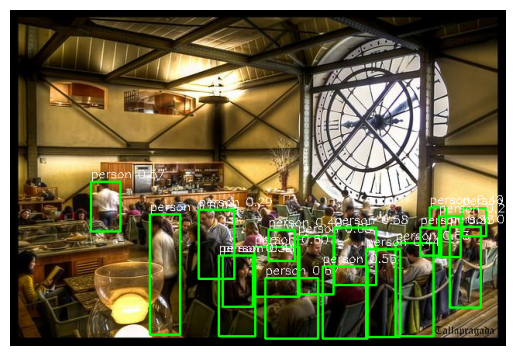


image 1/1 /content/valid/images/2018-02-09_15-16-26-417048_leftImg8bit_jpg.rf.19838ff2d97bd8f9ee2891c59b597bd7.jpg: 384x640 (no detections), 13.8ms
Speed: 6.6ms preprocess, 13.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


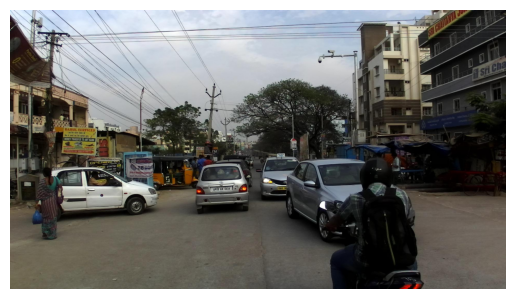


image 1/1 /content/valid/images/2010_000671_jpg.rf.6cf2325657ee8b0986aed4644510a865.jpg: 640x480 (no detections), 15.1ms
Speed: 3.3ms preprocess, 15.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


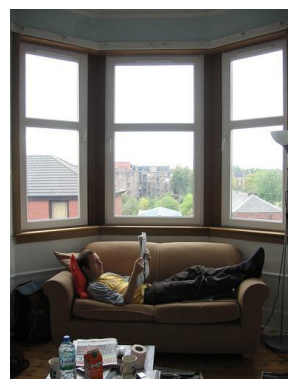


image 1/1 /content/valid/images/photo-1428908200541-d395094cc816_jpg.rf.59c226eb1c377985de5dbf126192ebed.jpg: 640x640 1 person, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


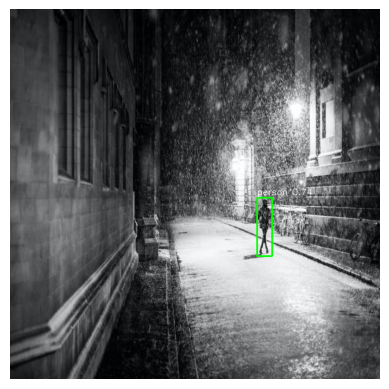


image 1/1 /content/valid/images/0003923_jpg.rf.e862e6e840edd7c6c23232cc4467f731.jpg: 384x640 2 persons, 16.0ms
Speed: 7.3ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


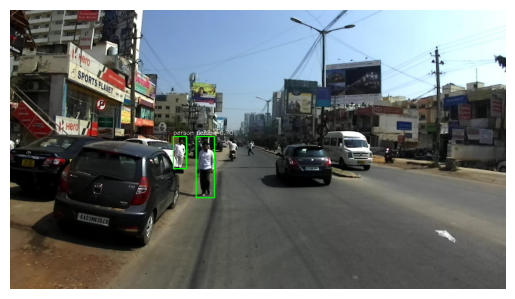


image 1/1 /content/valid/images/IMG20221107121605_jpg.rf.9c44b1b74cd2499a5abf1f709fceae28.jpg: 480x640 14 persons, 10.0ms
Speed: 3.4ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


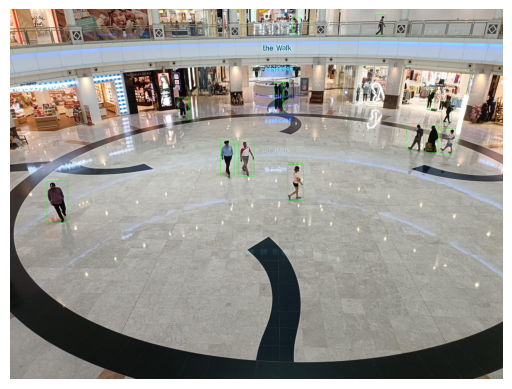


image 1/1 /content/valid/images/2018-05-31_13-4-14-348412_leftImg8bit_jpg.rf.ff3b6927904b68c3935cb1d3ea4734a2.jpg: 384x640 4 persons, 13.0ms
Speed: 4.3ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


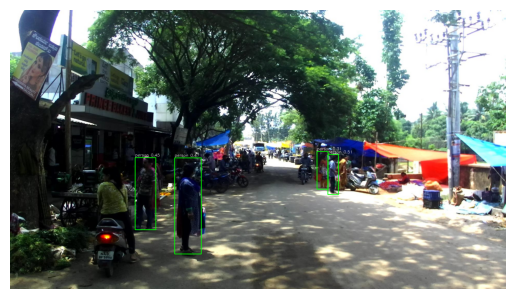


image 1/1 /content/valid/images/fall057_jpg.rf.42cec6b581e5fcf2eadaf71869f947b6.jpg: 384x640 1 person, 23.5ms
Speed: 2.5ms preprocess, 23.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


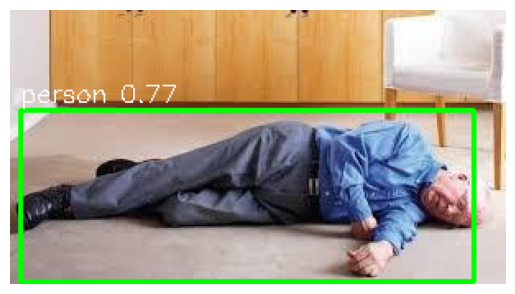


image 1/1 /content/valid/images/20230127_190602_mp4-59_jpg.rf.9833436368770f0b584b9427fcafb262.jpg: 384x640 22 persons, 20.0ms
Speed: 3.4ms preprocess, 20.0ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


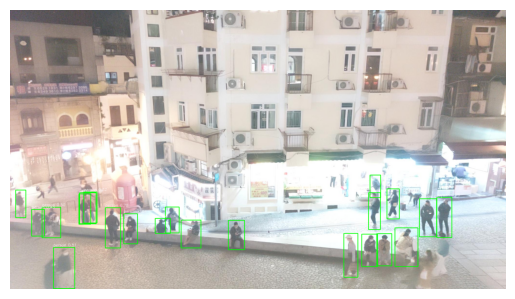


image 1/1 /content/valid/images/2012_003420_jpg.rf.68519885ea1233604a43f277d0395550.jpg: 480x640 15 persons, 20.2ms
Speed: 3.5ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


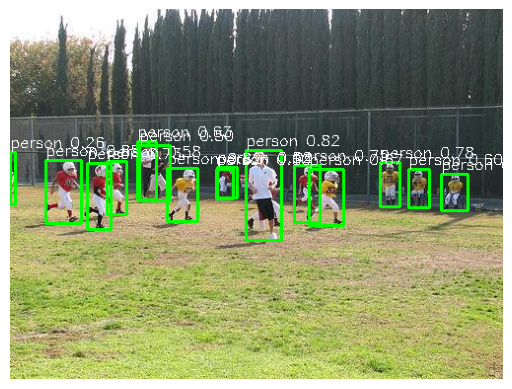

In [ ]:
import os


for img_path in os.listdir("valid/images")[:10]:
    img_path = os.path.join("./valid/images", img_path)
    results = model2(img_path)
    boxes = results[0].boxes

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf.item()
        cls = int(box.cls.item())
        label = f"{model2.names[cls]} {conf:.2f}"

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    plt.imshow(img)
    plt.axis('off')
    plt.show()